<a href="https://colab.research.google.com/github/prabhhav/AI-Data-Science-Projects/blob/main/Prabhhav_Project_1_House_Price_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KC House Price Prediction

In this exercise you'll try to build a regression model that predicts the price of a house.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

It's a great dataset for evaluating simple regression models.

https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/house/kc_house_data.csv") # read data into pandas dataframe

In [ ]:
df.head() # shows first 5 data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Writeup

1. Import necessary libs
2. Import Data
3. EDA (Viz, Dist, corr, dtype)
4. Clean data
5. Data Preprocessing/Transformation (encoding, norm, )
6. Test train split
7. Modeling [LR, DTR, RFR, ABR, KNNR)
8. Evaluating different models (CV)
9. Hyperparameter tuning (Grid Search)
10. Best model evaluation metrics




# 3.EDA

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df[['lat', 'long']].describe()

,lat,long
count,21613.000000,21613.000000
mean,47.560053,-122.213896
std,0.138564,0.140828
min,47.155900,-122.519000
25%,47.471000,-122.328000
50%,47.571800,-122.230000
75%,47.678000,-122.125000
max,47.777600,-121.315000


In [ ]:
#df = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [ ]:
#df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [ ]:
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')

In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,-0.005151,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
yr_built,0.021380,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,0.423898,-0.133124,1.000000,-0.224874,-0.346869,-0.148122,0.409356,0.326229,0.070958


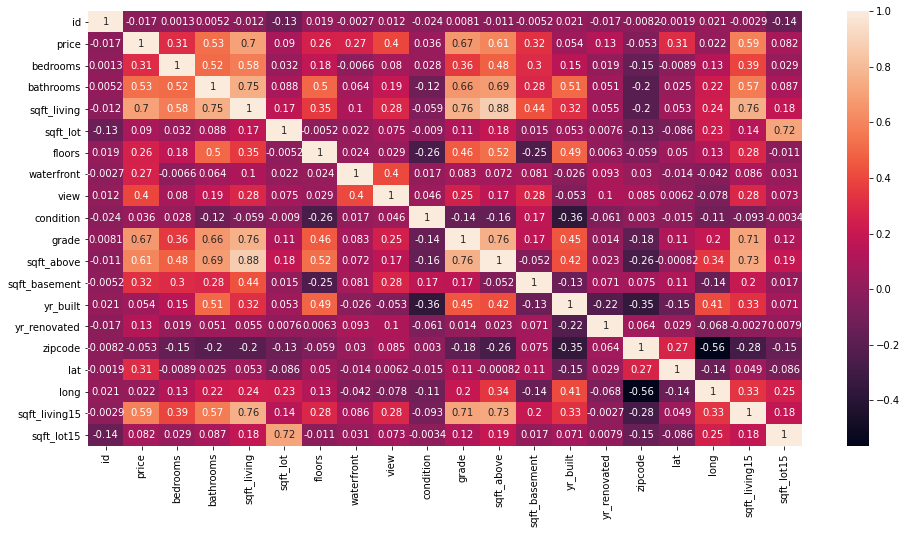

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

Factors affecting price are:
1. sqft_living15
2. lat
3. yr_renovated
4. sqft_basement
5. sqft_above
6. grade
7. View
8. waterfront
9. floors
10. sqft_living
11. bathrooms
12. bedrooms

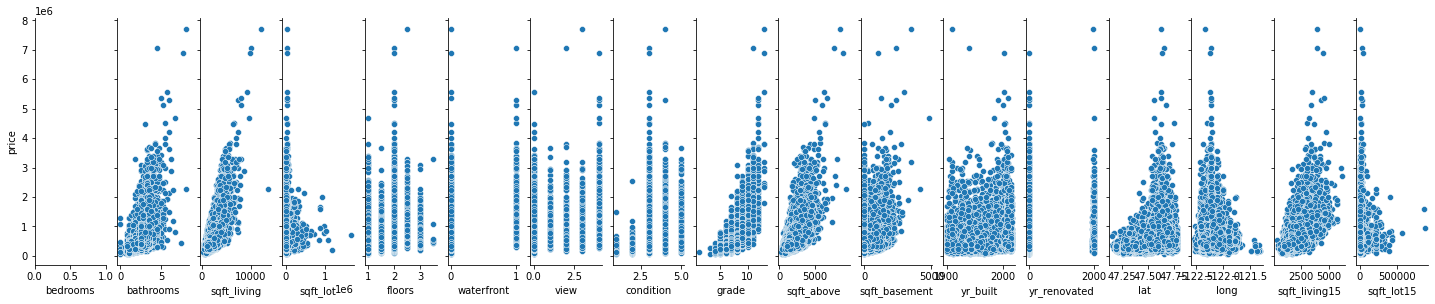

In [ ]:
g= sns.pairplot(df,
             x_vars=[ 'bedrooms', 'bathrooms', 'sqft_living',
                      'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                      'lat', 'long', 'sqft_living15', 'sqft_lot15'],
             y_vars=['price']
             )

g.fig.set_size_inches(20,5)

In [ ]:
plt.scatter(range(13),df.bedrooms.value_counts())

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.floors = df.floors.astype('category')
df.waterfront = df.waterfront.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.date = pd.to_datetime(df.date)
df.yr_built = pd.to_datetime(df.yr_built)
df.yr_renovated = pd.to_datetime(df.yr_renovated)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  category      
 4   bathrooms      21613 non-null  category      
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['sqft_living15', 'lat', 'sqft_basement', 'sqft_above', 'grade', 'view', 'waterfront', 'floors', 'sqft_living', 'bathrooms', 'bedrooms']]
y = df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
comparison = {"Algorithm":[], "Training score":[], "Testing score":[]}

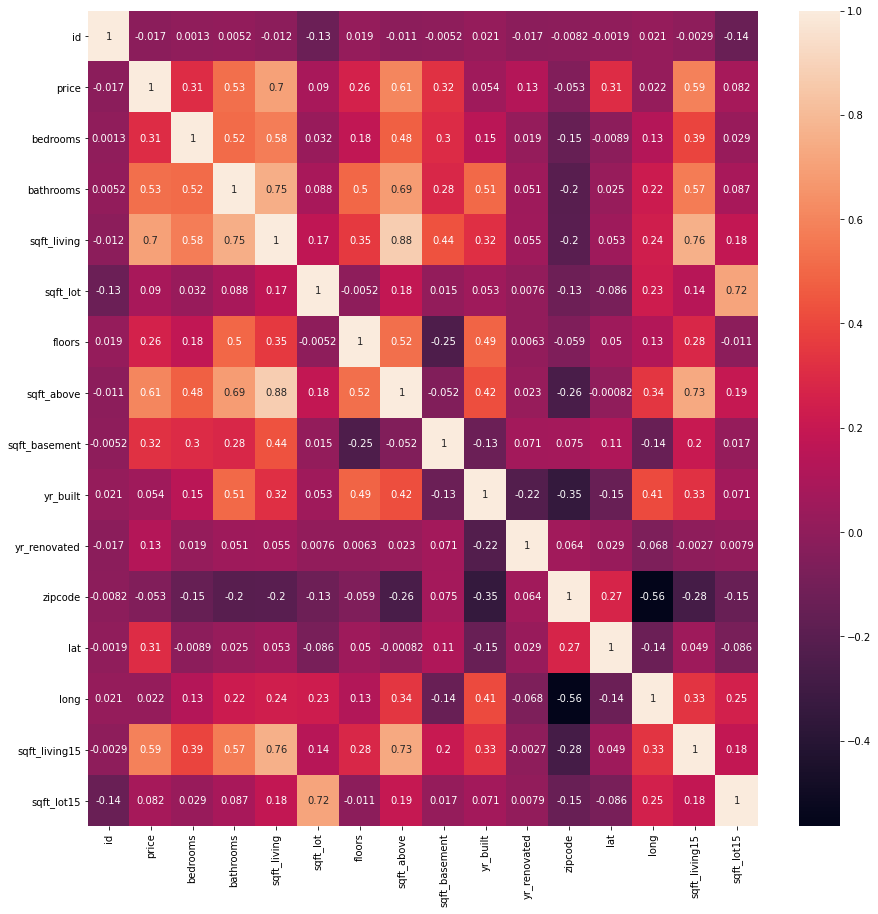

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

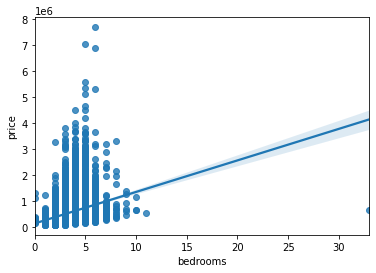

In [ ]:
sns.regplot(x="bedrooms", y="price", data=df)

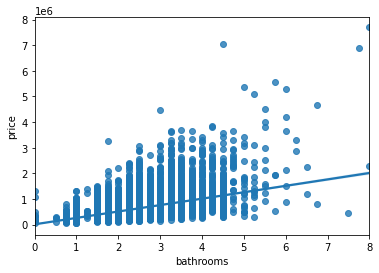

In [ ]:
sns.regplot(x="bathrooms", y="price", data=df)

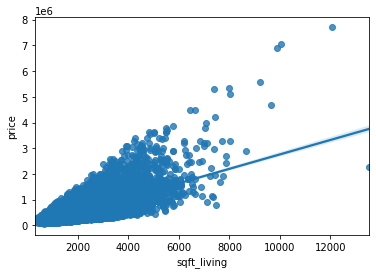

In [ ]:
sns.regplot(x="sqft_living", y="price", data=df)

A few points of observetion:
1. "Price" seems to have a significant correlation with "bathrooms", "sqft_living", "sqft_above", "sqft_living15", meanwhile also being affected by "bedrooms", "floors", "sqft_basement".
2. A lot of features exhibit correlations between one-another and hence cannot be considered "independent". (Shown in the next plot) 
> This might cause problems for Regression modelling later on. 

Regression Modelling

In [ ]:
results = {"Algorithm": [], "Best R-Squared": [], "Mean Squared Error": []}

## simple linear regression

In [ ]:
x=df[['sqft_living']]
y=df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(x,y)

0.49285321790379316

In [ ]:
yhat=lm.predict(x)
yhat[0:5]   

array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


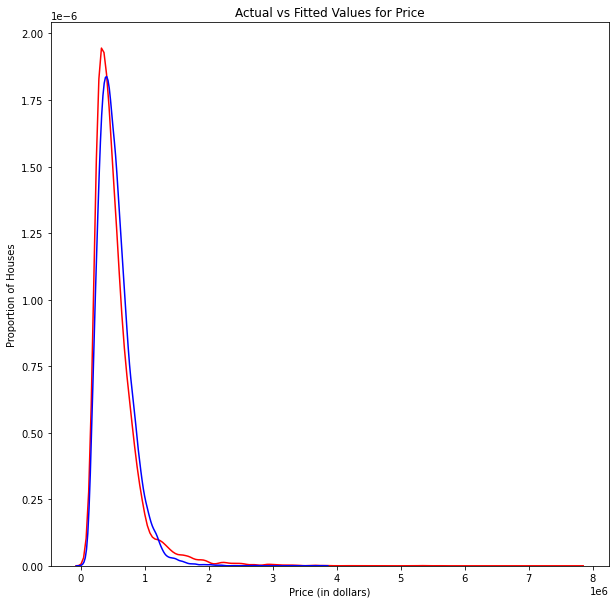

In [ ]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value") # hist=True
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

In [ ]:
r2_score(y, yhat)

0.4928532179037931

In [ ]:
mean_squared_error(y, yhat)

68351286833.039825

In [ ]:
results['Algorithm'].append("Univariate Linear Regression")
results['Best R-Squared'].append(r2_score(y, yhat))
results['Mean Squared Error'].append(mean_squared_error(y, yhat))

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
pipe = Pipeline([('std', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(X_train, y_train)

print("Training score:", pipe.score(X_train, y_train))
print("Testing score:",pipe.score(X_test,y_test))

comparison["Algorithm"].append("LinearRegression")
comparison["Training score"].append(pipe.score(X_train, y_train))
comparison["Testing score"].append(pipe.score(X_test, y_test))

Training score: 0.65708473915209
Testing score: 0.6596606035160868


Decision Tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
pipe = Pipeline([('dtr',DecisionTreeRegressor())])
pipe.fit(X_train,y_train)

print("Training score:", pipe.score(X_train,y_train))
print("Testing score:", pipe.score(X_test,y_test))

comparison["Algorithm"].append("DecisionTreeRegressor")
comparison["Training score"].append(pipe.score(X_train,y_train))
comparison["Testing score"].append(pipe.score(X_test,y_test))

Training score: 0.9993504471537987
Testing score: 0.6415453079429481


3) Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipe = Pipeline([('rfr', RandomForestRegressor())])
pipe.fit(X_train,y_train)

print("Training score:", pipe.score(X_train, y_train))
print("Testing score:", pipe.score(X_test,y_test))

comparison["Algorithm"].append("RandomForestRegressor")
comparison["Training score"].append(pipe.score(X_train,y_train))
comparison["Testing score"].append(pipe.score(X_test,y_test))

Training score: 0.972524856562679
Testing score: 0.7955438320919099


4) Ada boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
pipe = Pipeline([('ada', AdaBoostRegressor())])
pipe.fit(X_train,y_train)

print("Training score:",pipe.score(X_train,y_train))
print("Testing score:", pipe.score(X_test,y_test))

comparison["Algorithm"].append("AdaBoostRegressor")
comparison["Training score"].append(pipe.score(X_train,y_train))
comparison["Testing score"].append(pipe.score(X_test,y_test))

Training score: 0.12848220765594787
Testing score: -0.007560907750767898


Adaboosting using linear regressor

In [ ]:
pipe = Pipeline([('std',StandardScaler()), ('ada', AdaBoostRegressor( base_estimator=LinearRegression()))])
pipe.fit(X_train, y_train)

print("Training score:",pipe.score(X_train,y_train))
print("Testing score:", pipe.score(X_test, y_test))

comparison["Algorithm"].append("AdaBoostRegressor using linear regressor")
comparison["Training score"].append(pipe.score(X_train,y_train))
comparison["Testing score"].append(pipe.score(X_test, y_test))

Training score: 0.41798337110150563
Testing score: 0.36266145472345224


5) KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
error=[]
for i in range(1,40):
  pipe = Pipeline([('std',StandardScaler()),('knn',KNeighborsRegressor(i))])
  pipe.fit(X_train,y_train)
  knr_pred = pipe.predict(X_test)
  error.append(np.mean(y_test!= knr_pred))

Text(0, 0.5, 'Mean Error')

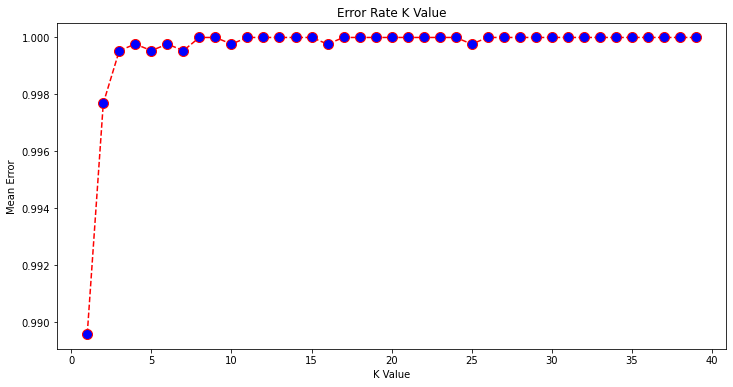

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
error = np.array(error)
optimal_neighbors = error.argmin()+1
optimal_neighbors

1

In [ ]:
pipe = Pipeline([('std',StandardScaler()),('knn',KNeighborsRegressor(optimal_neighbors))])
pipe.fit(X_train, y_train)

print("Training score:", pipe.score(X_train, y_train))
print("Testing score:", pipe.score(X_test, y_test))

comparison["Algorithm"].append("KNeighborsRegressor")
comparison["Training score"].append(pipe.score(X_train, y_train))
comparison["Testing score"].append(pipe.score(X_test,y_test))

Training score: 0.9987009749375966
Testing score: 0.5700816960733173


polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe = Pipeline([('pol',PolynomialFeatures(degree=4, include_bias=False)), ('lr',LinearRegression())])
pipe.fit(X_train, y_train)

print("Training score:", pipe.score(X_train, y_train))
print("Testing score:", pipe.score(X_test, y_test))

Training score: 0.6910169095463651
Testing score: -3.1680491452457673


In [ ]:
results = pd.DataFrame(comparison)
results

,Algorithm,Training score,Testing score
0,LinearRegression,0.657085,0.659661
1,DecisionTreeRegressor,0.999350,0.641545
2,RandomForestRegressor,0.972525,0.795544
3,AdaBoostRegressor,0.128482,-0.007561
4,AdaBoostRegressor using linear regressor,0.417983,0.362661
5,KNeighborsRegressor,0.998701,0.570082


Mutivariate Regression 

In [ ]:
X=df[['sqft_living','grade','sqft_above','sqft_living15']]
Y=df['price']

In [ ]:
X

,sqft_living,grade,sqft_above,sqft_living15
0,1180,7,1180,1340
1,2570,7,2170,1690
2,770,6,770,2720
3,1960,7,1050,1360
4,1680,8,1680,1800
...,...,...,...,...
21608,1530,8,1530,1530
21609,2310,8,2310,1830
21610,1020,7,1020,1020
21611,1600,8,1600,1410


In [ ]:
lr = LinearRegression()
lr.fit(X,Y)
print(lr.score(X,Y))
y_lr=lr.predict(X)
y_lr[0:5]  

0.5419589651239656


array([298899.89457469, 543157.88332606, 169830.79596416, 487423.33983944,
       489363.06793136])

In [ ]:
print(r2_score(Y,y_lr))
print(mean_squared_error(Y,y_lr))

0.5419589651239656
61733003661.600845


In [ ]:
results['Algorithm'].append("Multivariate Linear Regression")
results['Best R-Squared'].append(r2_score(Y,y_lr))
results['Mean Squared Error'].append(mean_squared_error(Y,y_lr))

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polyfeat=PolynomialFeatures(degree=2)
x_poly=polyfeat.fit_transform(X)

In [ ]:
poly=LinearRegression()
poly.fit(X,Y)
polypred=poly.predict(X)
poly.score(X,Y)

0.5419589651239656

In [ ]:
results['Algorithm'].append("Polynomial Linear Regression")
results['Best R-Squared'].append(r2_score(Y,polypred))
results['Mean Squared Error'].append(mean_squared_error(Y,polypred))

TypeError: ignored

Results

In [ ]:
results_log = pd.DataFrame(results)
results_log

,Algorithm,Training score,Testing score
0,LinearRegression,0.657085,0.659661
1,DecisionTreeRegressor,0.999350,0.641545
2,RandomForestRegressor,0.972525,0.795544
3,AdaBoostRegressor,0.128482,-0.007561
4,AdaBoostRegressor using linear regressor,0.417983,0.362661
5,KNeighborsRegressor,0.998701,0.570082


Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth':[1000,1100,1200,1300,1500]
}

In [ ]:
rf1 = RandomForestRegressor()
grid_search = GridSearchCV(svm.SVC(gamma='auto'))

In [ ]:
 grid_search.fit(X,Y)
 grid_search.best_params

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score

In [ ]:
from sklearn.model_selection import RandomizedSearcgCV

In [ ]:
n_estimators = [int(X) for X in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(X) for X in np.linspace(10,110,num=11)]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X, Y)